In [218]:
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
from math import log
from nltk.stem.wordnet import WordNetLemmatizer

In [228]:
class Collection():
    
    #############################################################
    # Part 1 : Creating the hashmap
    #############################################################
    
    # Initialising the file within the class
    def __init__(self):
        doc = open('collection.txt','r')
        self.data = BeautifulSoup(doc)
        
        
    # Reading in the different elements of each article as a list of values
    def read_article(self):    
        self.docid = [elem.get_text() for elem in self.data.select('docid')]
        self.docno = [elem.get_text() for elem in self.data.select('docno')]
        self.date = [elem.get_text().strip() for elem in self.data.select('date')]
        self.section = [elem.get_text().strip() for elem in self.data.select('section')]
        self.length = [elem.get_text().strip() for elem in self.data.select('length')]
        self.byline = [elem.get_text().strip() for elem in self.data.select('byline')]

        # Since there are only two <byline> values, setting its value as blank for the third article
        self.byline += " " 
        self.graphic = [elem.get_text().strip() for elem in self.data.select('graphic')]
        
        # Since there are only two <graphic> values, setting its value as blank for the third article        
        self.graphic += " "

        # Combining all the <p>..</p> values within <headline> 
        self.headline = []
        for elem in self.data.select('headline'):
            content = ''
            for e in elem.findAll('p'):
                content = content + " " + e.get_text().strip()
            self.headline.append(content)

        # Combining all the <p>..</p> values within <text> 
        self.doctext = []
        for elem in self.data.select('text'):
            content = ''
            for e in elem.findAll('p'):
                content = content + " " + e.get_text().strip()
            self.doctext.append(content)
            
            
    # Printing the individual saved article content
    def print_article(self):
        
        # Printing just the first article
        for i in range(1):
        #for i in range(3):
            print "Doc No. : " + str(self.docno[i])
            print "Doc ID : " + str(self.docid[i])
            print "Doc date : " + str(self.date[i])
            print "Doc Section : " + str(self.section[i])
            print "Doc length : " + str(self.length[i])
            print "Doc Byline : " + str(self.byline[i])
            print "Doc Headline : " + str(self.headline[i])
            print "Doc Text : " + str(self.doctext[i])
            print "Doc Graphic : " + str(self.graphic[i])
        
        
    # Basic processing of text
    def preprocess_text(self):
        i = 0
        for text in self.doctext:
            
            # Removing the punctuations and numbers
            text = re.sub("[^a-zA-Z]", " ", text) 

            # Converting to lowercase
            text = text.lower()   
            
            # Lemmatizing the words
            lemmatizer = WordNetLemmatizer()
            meaningful_words = [lemmatizer.lemmatize(w) for w in text.split(' ') ]

            self.doctext[i] = " ".join( meaningful_words )
            i = i+1
    
    # Creating the term document frequency dictionary
    def construct_tdm(self):
        
        # Hashmap between word and their occurence in the document : word -> list([docid, frequency])
        self.tdm = {}
        i=0
        
        # Frequency of words within the document
        self.total_freq = {}
        for text in self.doctext:
            
            # Frequency of words within the article
            within_doc_freq = {}
            content = text.split(' ')
            for word in content:
                if word in within_doc_freq:
                    within_doc_freq[word] += 1
                else:
                    within_doc_freq[word] = 1
                
                if word in self.total_freq:
                    self.total_freq[word] += 1
                else:
                    self.total_freq[word] = 1
                    
            for key in within_doc_freq:
                doc_freq = [self.docid[i],within_doc_freq[key]]
                if key in self.tdm:
                    self.tdm[key].append(doc_freq)
                else:
                    self.tdm[key] = [doc_freq]
            
            i += 1
    
    
    # Displaying the hashmap
    def print_tdm(self):
        
        # Printing just the first 3 elements of the hashmap
        for item in list(self.tdm)[1:4]:
        # for item in self.tdm:
            print "Key is : " + str(item)
            print self.tdm[item]
            print "\n"
            
            
    ###########################################################       
    # Part 2 : Plotting the distribution
    ###########################################################
    
    def plot_distribution(self):
        freq_of_count = {}
        for key in self.total_freq:
            if self.total_freq[key] in freq_of_count:
                freq_of_count[self.total_freq[key]] += 1
            else:
                freq_of_count[self.total_freq[key]] = 1

        fig = plt.figure(figsize=(12,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        x1 = list(freq_of_count.keys())
        y1 = list(freq_of_count.values())
        
        ax1.scatter(x1,y1)
        ax1.set_title("Count Distribution Plot")
        ax1.set_xlabel("Frequency of words in the document")
        ax1.set_ylabel("Frequency of count of words")
          
        # Plotting the log values
        x2 = [log(value,10) for value in x1]
        y2 = [log(value,10) for value in y1]
        
        ax2.scatter(x2,y2)
        ax2.plot(x2,y2,color='r', linewidth = 1.0)
        ax2.set_title(" Log - Count Distribution Plot")
        ax2.set_xlabel("Log of Frequency of words in the document")
        ax2.set_ylabel("Log of Frequency of count of words")
    
        plt.show()

In [229]:
article = Collection()
article.read_article()

In [230]:
article.print_article()

Doc No. :  LA010189-0001 
Doc ID :  1 
Doc date : January 1, 1989, Sunday, Home Edition
Doc Section : Book Review; Page 1; Book Review Desk
Doc length : 1206 words
Doc Byline : By James E. Oberg , Oberg, a space engineer in Houston, is the author of 
Uncovering Soviet Disasters: Exploring the Limits of Glasnost (Random House).
Doc Headline :  NEW FALLOUT FROM CHERNOBYL; THE SOCIAL IMPACT OF THE CHERNOBYL DISASTER BY DAVID R. MARPLES (ST. MARTIN'S 
PRESS: $35, CLOTH; $14.95, PAPER; 316 PP., ILLUSTRATED; 0-312-02432-0)
Doc Text :  The onset of the new Gorbachev policy of glasnost, commonly mistranslated as 
openness but closer in connotation to candor or publicizing, has complicated 
the task of Soviet secret-keepers and has allowed substantial new Western 
insights into Soviet society. David R. Marples' new book, his second on the 
Chernobyl accident of April 26, 1986, is a shining example of the best type of 
non-Soviet analysis into topics that only recently were absolutely taboo in 


In [231]:
article.preprocess_text()
article.construct_tdm()
article.print_tdm()

Key is : aided
[[u' 1 ', 1]]


Key is : all
[[u' 1 ', 1], [u' 31 ', 3], [u' 74 ', 3]]


Key is : teach
[[u' 74 ', 1]]




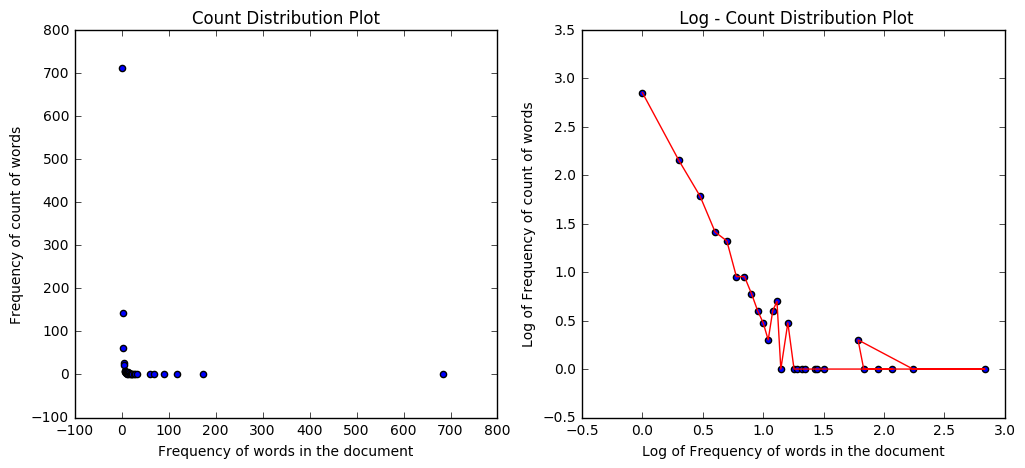

In [232]:
article.plot_distribution()